# PHYS 411 - Homework 4
Due Tuesday September 27, 2022 at 9:30

You can use these buttons below to launch this Jupyter notebook in either [binder](https://mybinder.org/) or [Colab](https://colab.research.google.com/).

[![Open in Binder](https://mybinder.org/badge_logo.svg)](http://beta.mybinder.org/v2/gh/mgrau/phys411/main?urlpath=%2Ftree/Homework%204.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mgrau/phys411/blob/main/Homework%204.ipynb)

When you are finished with your work, please print to a PDF file and submit via canvas. For full credit please be sure to clearly explain what you are doing.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
from scipy.integrate import trapezoid

# Problem 1 - Ground state configuration
Write the ground state configuration of singly ionized strontium (Sr$^+$). What is the configuration of the first excited state?

# Problem 2 - Hydrogen-like ion radial wavefunctions
1. Modify the hydrogen radial wavefunction `R(n,l)` to also depend on proton number $Z$. You can check your answer against `plot_radial`, which will solve the radial Schrodinger equation to get the radial wavefunction.
2. Use your function to plot the radial probability distribution of the 4p state in H, Li$^{2+}$ and C$^{5+}$.
3. Calculate the expectation value of $\left<r\right>$ of the 4p state for H, Li$^{2+}$ and C$^{5+}$. Comment on your findings.

In [2]:
from math import factorial
def R(n, l, r):
    rho = 2*r/n
    A = np.sqrt((2/n)**3*factorial(n-l-1)/(2*n*factorial(n+l)))
    L = scipy.special.genlaguerre(n-l-1, 2*l+1)
    return A * rho**l * np.exp(-rho/2) * L(rho)

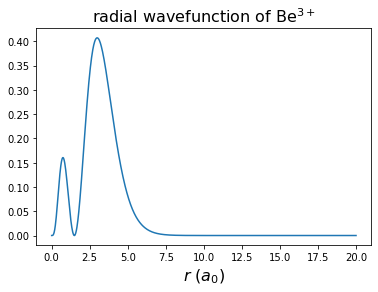

In [3]:
from scipy.integrate import solve_ivp, trapezoid

def plot_radial(Z, n, l, r):
    def dP(rho, P, n, l):
        return np.array([P[1], (l*(l+1)/rho**2+1-2*n/rho) * P[0]])

    rho = Z*r/n
    rho = rho[::-1] 
    sol = solve_ivp(dP, t_span=[rho[0], rho[-1]], t_eval=rho, y0=[0, 1], args=(n, l))
    P = sol.y[0][::-1]
    R = P/r
    R /= np.sqrt(trapezoid(r**2*R**2,r))
    plt.plot(r, r**2*R**2)
  
r = np.linspace(0.01, 20, 1000)
plot_radial(Z=4, n=3, l=1, r=r)
plt.xlabel(r'$r$ ($a_0$)', fontsize=16);
plt.title(r'radial wavefunction of Be$^{3+}$', fontsize=16);

# Problem 3 - Quantum defect of Potassium
I've given you the binding energy of various energy levels (in units of eV) of potassium, grouped by different valence electron orbital angular momentum.

1. Write down the configuration of the ground state of potassium
2. Plot the energy levels of potassium, with energy on the vertical axis, and orbital angular momentum on the horizontal axis. Subtract off the first ionization energy (IE=4.34066373 eV), such that the ground state energy is at 0 eV. Represent each state as a horizontal line. What is the configuration of the lowest energy level in each series (What are the quantum numbers $n$ and $l$)?
3. Each of these series of states can be characetized by a *quantum defect*, according to the formula
$$
E_{nl} = -\frac{\text{Ry}}{(n-\delta_l)^2}
$$
where $\text{Ry}$ is the Rydberg constant in units of eV. Calculate the quantum defects $\delta_s$, $\delta_p$, $\delta_d$, and $\delta_f$ for potassium. 
**Hint: one potential way to do this is to plot $n$ on the vertical axis and $\sqrt{-E}$ on the horizontal axis. You should get a straight line. If you fit this line using `np.polyfit(x,y,1)` you should be able to extract the quantum defect.**

In [4]:
IE = 4.34066373

data = {
    "s": [
        -4.34066373,
        -1.7337036300000004,
        -0.9372094300000002,
        -0.5871352300000003,
        -0.40225893000000035,
        -0.2927840900000005,
        -0.22262446000000047,
        -0.17497323999999992,
        -0.14113558000000026,
        -0.11624444999999994,
    ],
    "p": [
        -2.7259357760333334,
        -1.2765323300000002,
        -0.7445147300000001,
        -0.48811472999999994,
        -0.3447500633333336,
        -0.25645662999999974,
        -0.19822649666666692,
        -0.15780243000000027,
        -0.12859666333333397,
        -0.10680996333333326,
    ],
    "d": [
        -1.6705892500000004,
        -0.9438060500000005,
        -0.59814547,
        -0.41085977000000007,
        -0.2989833940000004,
        -0.22709450600000025,
        -0.17825562000000073,
        -0.14359849199999974,
        -0.11813159400000028,
        -0.09887615400000005,
    ],
    "f": [
        -0.8532547300000002,
        -0.54591273,
        -0.37897573000000007,
        -0.27834673,
        -0.21305572999999978,
        -0.16830773000000043,
        -0.1363077300000004,
        -0.11263372999999977,
        -0.09465473000000024,
        -0.08064573000000053,
    ],
}

# Problem 4 - Spherical Shells
Show that $\sum_{m=-l}^l \left| Y_{lm}(\theta,\phi)\right|^2$ is spherically symmetric. Show this for the specific cases of $l=1$ and $l=2$. **Hint: You might do this by plotting the sum of the magnitudes of the spherical harmonic functiosn in 3d**